## Model 2

### Sprint 4

#               <h1><center>Betting on Football</center></h1>  


# Table of Content
I.	Introduction.

II.	Data loading, cleaning, and feature engineering.

III.	Exploratory data analysis.

IV.	Statistical Inference.

V.	Modeling.

VI.	Conclusions.

VII.	Recommendations.




# I. Introduction

The goal of this project is to extract the potential business insights from the “Ultimate 25k+ Matches Football Database” for my company, while we aim to offer a new betting field  - soccer. The overall idea is to get the following insights:
1.	Which leagues are in which countries?
2.	Which leagues score the most/fewest goals?
3.	Who are the top scorers in each team and league?
4.	Is there such a thing as home advantage?
5.	Can we predict how many goals each team will score in each match?
6.	Can we predict which team will win the match?


##### The main objective is to figure out if the database can help the company predict the outcome of the future matches accurately enough to adjust the accurate betting odds and thus, earn from the betting activity good margins. In addition, which league should the company focus first to guarantee the interest from sport betters.
In addition to business goal, this project aims to:
1.	Practice identifying opportunities for data analysis, raising hypothesis, and formulating research tasks.
2.	Practice performing EDA, statistical inference, and prediction.
3.	Practice working with SQL datasets.
4.	Practice visualizing data.



In [1]:
import sqlite3
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from scipy.stats import ttest_ind, t
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
#pd.options.mode.copy_on_write = True
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
from IPython.core.display import HTML      # center plots in the notebook
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# II.	Data loading, cleaning, and feature engineering.

## 1. Data Loading

In [3]:
# establishing connection to sql database and reading the table names
conn = sqlite3.connect('database.sqlite')
tables=[]
def sql_fetch(conn):
    cur = conn.cursor()
    cur.execute('SELECT name FROM sqlite_master where type = "table"')
    table_name = list(cur.fetchall())
    tables.append(table_name)
sql_fetch(conn)
tables = [item[0].lower() for sublist in tables for item in sublist]
print(tables)

['sqlite_sequence', 'player_attributes', 'player', 'match', 'league', 'country', 'team', 'team_attributes']


In [4]:
# loading the tables from the database into pandas dataframe for futher review.
table_dict={}
for table in tables:
    table_dict[table] = pd.read_sql(f'SELECT * from {table}', conn)
for key in table_dict:
    globals()[key] = table_dict[key].copy()

## 2. Data cleaning and feature engineering.
In this section I will review the content of the tables focusing on missing values.

### A. Reading the content of the tables, filling the blank values, and deleting the rows where the filling is inexpediant

In [5]:
tables = [player_attributes, player, match, league, country, team, team_attributes]
table_names = ['player_attributes', 'player', 'match', 'league', 'country', 'team', 'team_attributes']

for table, table_name in zip(tables, table_names):
    if table.isnull().sum().any():
        print(f"Table '{table_name}' has missing values")
    else:
        print(f"Table '{table_name}' does not have missing values")

Table 'player_attributes' has missing values
Table 'player' does not have missing values
Table 'match' has missing values
Table 'league' does not have missing values
Table 'country' does not have missing values
Table 'team' has missing values
Table 'team_attributes' has missing values


In [6]:
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [7]:
# working with player_attributes table. I will calculate what percentage of the values are missing
total_rows = len(player_attributes)
missing_percentages = []
for column in player_attributes.columns:
    missing_values = player_attributes[column].isnull().sum()
    missing_rate = round((missing_values/total_rows)*100,2)
    missing_percentages.append((column, missing_rate))

missing_player_attributes = pd.DataFrame(missing_percentages, columns=['Column','Missing Percentage'])
missing_player_attributes

,Column,Missing Percentage
0,id,0.00
1,player_fifa_api_id,0.00
2,player_api_id,0.00
3,date,0.00
4,overall_rating,0.45
5,potential,0.45
6,preferred_foot,0.45
7,attacking_work_rate,1.76
8,defensive_work_rate,0.45
9,crossing,0.45


Based on the table, other than ids and dates, there 0.45% of rows that miss all the features, which mean that feature engineering will not work and filling the blanks with means, modes, or 0 would not benefit the dataset with accuracy for futher analysis. Thus, I choose to drop those rows that have all the features missing.

In [8]:
threshold = 0.5
total_rows = len(player_attributes)
selected_rows = []

for index, row in player_attributes.iterrows():
    missing_values = row.isnull().sum()
    missing_rate = missing_values / len(player_attributes.columns)
    if missing_rate <= threshold:
        selected_rows.append(index)

player_attr_new = player_attributes.loc[selected_rows]

In [9]:
total_rows1 = len(player_attr_new)
missing_percentages1 = []
for column in player_attr_new.columns:
    missing_values1 = player_attr_new[column].isnull().sum()
    missing_rate1 = round((missing_values1/total_rows1)*100,2)
    if missing_rate1>0:
        missing_percentages1.append((column, missing_rate1))

missing_player_attributes1 = pd.DataFrame(missing_percentages1, columns=['Column','Missing Percentage'])
missing_player_attributes1

,Column,Missing Percentage
0,attacking_work_rate,1.31
1,volleys,1.02
2,curve,1.02
3,agility,1.02
4,balance,1.02
5,jumping,1.02
6,vision,1.02
7,sliding_tackle,1.02


After removing the rows with missing all the features, I got a table wiht only 8 columns that have ~ 1% of missing values. Although the missing value is low, some of the goals of this project is to practice modeling and statistical inference. Thus, I will use missing data imputation using machine learning technique to fill the missing values.

In [12]:
# performing missing data imputation
mpa = missing_player_attributes1
excluded_columns = ['id', 'player_fifa_api_id', 'player_api_id', 'date', 'preferred_foot', 
                    'attacking_work_rate', 'defensive_work_rate']
incomplete_columns = [col for col in mpa['Column'].tolist() if col not in excluded_columns]
feature_columns = [col for col in player_attr_new.columns if col not in excluded_columns and 
                   col not in incomplete_columns]

player_attr_sorted = player_attr_new.sort_values(by=['player_api_id', 'date'])

for player_api_id, player_data in player_attr_sorted.groupby('player_api_id'):
    for target_column in incomplete_columns:
        missing_indices = player_data[player_data[target_column].isnull()].index
        if len(missing_indices) > 0:
            for missing_index in missing_indices:
                previous_index = player_data.loc[:missing_index][target_column].last_valid_index()
                future_index = player_data.loc[missing_index:][target_column].first_valid_index()
                      
                if previous_index is not None:
                    player_attr_new.loc[missing_index, target_column] = player_data.loc[previous_index, 
                                                                                    target_column]
                elif future_index is not None:
                    player_attr_new.loc[missing_index, target_column] = player_data.loc[future_index, 
                                                                                    target_column]
                else:
                    for target_column in incomplete_columns:
                        X = player_attr_new[feature_columns]
                        y = player_attr_new[target_column]
                        missing_indices = (
                            player_attr_new[player_attr_new[target_column].isnull()].index)
                        complete_rows = player_attr_new.dropna(subset=[target_column])
                        incomplete_rows = player_attr_new.loc[missing_indices]
    
                        tree_model = DecisionTreeRegressor()
                        tree_model.fit(complete_rows[feature_columns], complete_rows[target_column])
                        missing_value = tree_model.predict(incomplete_rows[feature_columns])
                        player_attr_new.loc[missing_indices, target_column] = missing_value

In [13]:
# Checking model accuracy
X = player_attr_new[feature_columns]
y = player_attr_new[incomplete_columns]

accuracy_results = pd.DataFrame(columns=['Column', 'MAE', 'Mean', 'Median', 'Std'])

for target_column in incomplete_columns:
    X_train, X_test, y_train, y_test = train_test_split(X, y[target_column], test_size=0.2, random_state=42)
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mae = round(mean_absolute_error(y_test, y_pred),2)
    col_mean = round(player_attr_new[target_column].mean(),2)
    col_median = player_attr_new[target_column].median()
    col_std = round(player_attr_new[target_column].std(),2)
    accuracy_results = pd.concat([accuracy_results, pd.DataFrame({'Column': [target_column],
                                                                  'MAE': [mae], 
                                                                  'Mean':[col_mean],
                                                                  'Median':[col_median],
                                                                  'Std':[col_std]})], 
                                 ignore_index=True)

In [14]:
accuracy_results

,Column,MAE,Mean,Median,Std
0,volleys,1.71,49.46,52.0,18.27
1,curve,1.72,52.94,56.0,18.25
2,agility,1.69,65.95,68.0,12.93
3,balance,2.04,65.21,67.0,13.04
4,jumping,2.06,66.98,68.0,11.00
5,vision,1.82,57.91,60.0,15.13
6,sliding_tackle,1.34,48.03,53.0,21.60


In this test result case, the mean absolute error MAE is around 2 and the mean value of the target variables varies from 50 to 67, it means that, on average, the model's predictions deviate from the true values by approximately 2 units. Considering that the standard deviation varies from 11 to 22, an MAE of 2 indicates relatively low prediction errors compared to the variability in the target variable.

I will perform statistical test of the feature prediction.

To check whether the filled values in the player_attr_new dataframe have significantly altered the distribution compared to the original player_attributes dataframe, I will formulate the following statistical hypothesis:

Null Hypothesis (H0): The distribution of the original player_attributes dataframe is not significantly different from the distribution of the filled player_attr_new dataframe.

Alternate Hypothesis (H1): The distribution of the original player_attributes dataframe is significantly different from the distribution of the filled player_attr_new dataframe.

To test this hypothesis, I will use statistical tests such as the t-test. The acceptance of Null Hypothesis is expected in this test.

In [15]:
target_columns = y.columns.tolist()
test_results = pd.DataFrame(columns=['Column', 'P_value'])

for column in target_columns:
    original_data = player_attributes[column].dropna().values
    filled_data = player_attr_new[column].values
    stat, p = stats.ttest_ind(original_data, filled_data)
    test_results = pd.concat([test_results, pd.DataFrame({'Column': [column], 
                                                          'P_value': [round(p,2)]})], 
                             ignore_index=True)


In [16]:
test_results

,Column,P_value
0,volleys,0.87
1,curve,0.66
2,agility,0.57
3,balance,0.63
4,jumping,0.77
5,vision,0.46
6,sliding_tackle,0.68


The p values for the test result are all much higher than 0.05 set confidence level. Thus I accept the Null Hypothesis (H0), and asume that generated features are accurate enough and can be used for futher analysis.


The missing values that were filled were numeric. One of the missing features - 'attacking_work_rate' is categorical. I will use decision tree classifier to clasify the missing values based on the other player features available.

In [17]:
attacking_work_rate_col = 'attacking_work_rate'
missing_indices = player_attr_new[player_attr_new[attacking_work_rate_col].isnull()].index
complete_rows = player_attr_new.dropna(subset=[attacking_work_rate_col])
incomplete_rows = player_attr_new.loc[missing_indices]

X_train = complete_rows[feature_columns]
y_train = complete_rows[attacking_work_rate_col]

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
missing_values = classifier.predict(incomplete_rows[feature_columns])
player_attr_new.loc[missing_indices, attacking_work_rate_col] = missing_values

In [18]:
# testing if the model filled the missing values well.
test_size = pd.DataFrame(columns=['Column', 'Missing'])
id_size = player_attr_new['id'].size
for column in player_attr_new.columns:
    col_size = player_attr_new[column].size
    diff =  id_size - col_size
    if diff > 0:
        test_size = pd.concat([test_size, pd.DataFrame({'Column':[column],'Missing':[diff]})])
if test_size.size > 0:
    test_size
else:
    print('There are no missing values in the Player Attribute table')

There are no missing values in the Player Attribute table


In [19]:
# working with team_attributes table. I will calculate what percentage of the values are missing
total_rows = len(team_attributes)
missing_percentages = []
for column in team_attributes.columns:
    missing_values = team_attributes[column].isnull().sum()
    missing_rate = round((missing_values/total_rows)*100,2)
    missing_percentages.append((column, missing_rate))

missing_team_attributes = pd.DataFrame(missing_percentages, columns=['Column','Missing Percentage'])
missing_team_attributes[missing_team_attributes['Missing Percentage']>0]

,Column,Missing Percentage
6,buildUpPlayDribbling,66.46


Only one collumn in the team_attributes has missing values. Just as with the missing player attributes, I will use missing data imputation using machine learning technique to fill the missing values for the team attributes as well.

In [20]:
team_attributes_new = team_attributes
player_dribbling = "buildUpPlayDribbling"
complete_rows = team_attributes_new.dropna(subset=[player_dribbling])
incomplete_rows = team_attributes_new[team_attributes_new[player_dribbling].isnull()]
feature_columns = [col for col in team_attributes_new.columns if col !=player_dribbling]

if not incomplete_rows.empty:
    X_train = complete_rows[feature_columns]
    y_train = complete_rows[player_dribbling]

    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_train_encoded = encoder.fit_transform(X_train)
    encoded_feature_columns = encoder.get_feature_names_out(feature_columns)
    
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train_encoded, y_train)

    X_missing = incomplete_rows[feature_columns]
    X_missing_encoded = encoder.transform(X_missing)
    missing_values = classifier.predict(X_missing_encoded)

    team_attributes_new.loc[team_attributes_new[player_dribbling].isnull(), 
                            player_dribbling] = missing_values


In [21]:
# checking of all the missing values of the dataframe were filled.
test2_size = pd.DataFrame(columns=['Column', 'Missing'])
id_size = team_attributes_new['id'].size
for column in team_attributes_new.columns:
    col_size = team_attributes_new[column].size
    diff =  id_size - col_size
    if diff > 0:
        test2_size = pd.concat([test_size, pd.DataFrame({'Column':[column],'Missing':[diff]})])
if test2_size.size > 0:
    test_size
else:
    print('There are no missing values in the Player Attribute table')

There are no missing values in the Player Attribute table


In [22]:
#testing if filled data did a significant effect on dataframe
target_column = "buildUpPlayDribbling"
original_data = team_attributes[target_column].dropna().values
filled_data = team_attributes_new[target_column].values
stat, p = stats.ttest_ind(original_data, filled_data)
a = team_attributes['buildUpPlayDribbling'].mean().round(2)
b = team_attributes_new['buildUpPlayDribbling'].mean().round(2)
print(f'The mean of the buildUpPlayDribbling before the filling of the missing values was {a}, after\
filling the missing values it was {b}, the p test result returned P-value = {p}, which suggests that \
the filling of the missing values was very accurate')

The mean of the buildUpPlayDribbling before the filling of the missing values was 36.87, afterfilling the missing values it was 36.87, the p test result returned P-value = 1.0, which suggests that the filling of the missing values was very accurate


In [23]:
# working with team table. 
team.count()

id                  299
team_api_id         299
team_fifa_api_id    288
team_long_name      299
team_short_name     299
dtype: int64

The missing values of the team table is team_fifa_api_id, which will not be used in the analysis, thus it is ignored.

The table match has multiple missing values. The handindling of them will be done in modeling part of this project, if necessary.

Now, as I have handeled all the missing values that I considered important, I can start exploratory data analysis, which will also help aswering some of the initial question of this project.

# II. Exploratory data analysis:
In EDA I will focus on the following project questions

1.	Which leagues are in which countries?

2.	Which leagues score the most/fewest goals?

3.	Who are the top scorers in each team and league? Identify, which team scores the most in what season and then try finding the composition of that team.

4. Additional analysis for Google Data Studio:

    4.1. How many teams are in each league?

    4.2. How many wins/losses different teams have?

    4.3. The factors that correlate with the player ability to score.



## II.1. Which leagues are in which countries?
To answer this question, I will create a new table using SQL.

In [24]:
query1 = 'SELECT c.name, c.id, l.name FROM league l JOIN country c on l.country_id = c.id'
cur = conn.cursor()
cur.execute(query1)
country_league_data = cur.fetchall()
country_league = pd.DataFrame(country_league_data, columns=['country', 'id', 'league_name'])
country_league

,country,id,league_name
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League
2,France,4769,France Ligue 1
3,Germany,7809,Germany 1. Bundesliga
4,Italy,10257,Italy Serie A
5,Netherlands,13274,Netherlands Eredivisie
6,Poland,15722,Poland Ekstraklasa
7,Portugal,17642,Portugal Liga ZON Sagres
8,Scotland,19694,Scotland Premier League
9,Spain,21518,Spain LIGA BBVA


## II.2. Which leagues score the most/fewest goals?

To answer this question Il will extract the number of goals the player scored from the match table goal column XML record. 

For the team goal value I will use match table home and away team scores.

In [25]:
# Parcing the goal XML column
rows = []
for index, row in match.iterrows():
    if pd.notnull(row['goal']):
        root = ET.fromstring(row['goal'])
        goals = []
        for value in root.findall('value'):
            player_elem = value.find('player1')
            team_elem = value.find('team')
            if player_elem is not None and team_elem is not None:
                player_id = int(player_elem.text)
                team_id = int(team_elem.text)
                goals.append((player_id, team_id))
        for goal in goals:
            new_row = {
                'season': row['season'],
                'date': row['date'],
                'league_id': row['league_id'],
                'country_id': row['country_id'],
                'player_id': goal[0],
                'team_id': goal[1],
                'goal_scored': 1
            }
            rows.append(new_row)

player_goal = pd.DataFrame(rows)

In [26]:
player_goal.head()

,season,date,league_id,country_id,player_id,team_id,goal_scored
0,2008/2009,2008-08-17 00:00:00,1729,1729,37799,10261,1
1,2008/2009,2008-08-17 00:00:00,1729,1729,24148,10260,1
2,2008/2009,2008-08-16 00:00:00,1729,1729,26181,9825,1
3,2008/2009,2008-08-16 00:00:00,1729,1729,30853,8650,1
4,2008/2009,2008-08-16 00:00:00,1729,1729,23139,8654,1


In [27]:
# team score calculation
rows = []
for index, row in match.iterrows():
    home_team_id = row['home_team_api_id']
    away_team_id = row['away_team_api_id']
    home_goals = row['home_team_goal']
    away_goals = row['away_team_goal']
    if home_goals > 0:
        new_row = {
            'season': row['season'],
            'date': row['date'],
            'league_id': row['league_id'],
            'country_id': row['country_id'],
            'team_id': home_team_id,
            'goal_scored': home_goals
        }
        rows.append(new_row)
    if away_goals > 0:
        new_row = {
            'season': row['season'],
            'date': row['date'],
            'league_id': row['league_id'],
            'country_id': row['country_id'],
            'team_id': home_team_id,
            'goal_scored': home_goals
        }
        rows.append(new_row)

team_goals = pd.DataFrame(rows)

In [28]:
# Joining the table with the country_league and also team_attribute and player name.
temp_merged = player_goal.merge(player[['player_api_id','player_name']], left_on='player_id', 
                                     right_on='player_api_id')
temp_merged = temp_merged.merge(team[['team_api_id','team_long_name',
                                      'team_short_name']], left_on='team_id', right_on='team_api_id')
temp_merged = temp_merged.merge(country_league[['country', 'id', "league_name"]], left_on='country_id',
                               right_on='id')
player_goal_table = temp_merged[['season', 'date', 'country', 'league_name', 'team_long_name',
                          'team_short_name','player_name','goal_scored']]
player_goal_table = player_goal_table.rename(columns={'team_long_name': 'team_long', 'team_short_name': 'team_short',
                                        'league_name': 'league', 'player_name':'player',
                                        'goal_scored':'scored'})
player_goal_table.head()


,season,date,country,league,team_long,team_short,player,scored
0,2008/2009,2008-08-17 00:00:00,England,England Premier League,Newcastle United,NEW,Obafemi Martins,1
1,2008/2009,2008-10-28 00:00:00,England,England Premier League,Newcastle United,NEW,Obafemi Martins,1
2,2008/2009,2008-11-03 00:00:00,England,England Premier League,Newcastle United,NEW,Obafemi Martins,1
3,2008/2009,2008-11-03 00:00:00,England,England Premier League,Newcastle United,NEW,Obafemi Martins,1
4,2008/2009,2008-11-15 00:00:00,England,England Premier League,Newcastle United,NEW,Obafemi Martins,1


In [29]:
# joining the merged table with the team goals
temp_merged2 = team_goals.merge(team[['team_api_id','team_long_name',
                                      'team_short_name']], left_on='team_id', right_on='team_api_id')
temp_merged2 = temp_merged2.merge(country_league[['country', 'id', "league_name"]], left_on='country_id',
                               right_on='id')
team_goal_table = temp_merged2[['season', 'date', 'country', 'league_name', 'team_long_name',
                          'team_short_name','goal_scored']]
team_goal_table = team_goal_table.rename(columns={'team_long_name': 'team_long', 'team_short_name': 'team_short',
                                        'league_name': 'league', 'player_name':'player',
                                        'goal_scored':'scored'})
team_goal_table.head()

,season,date,country,league,team_long,team_short,scored
0,2008/2009,2008-08-17 00:00:00,Belgium,Belgium Jupiler League,KRC Genk,GEN,1
1,2008/2009,2008-08-17 00:00:00,Belgium,Belgium Jupiler League,KRC Genk,GEN,1
2,2008/2009,2008-11-15 00:00:00,Belgium,Belgium Jupiler League,KRC Genk,GEN,1
3,2008/2009,2008-11-15 00:00:00,Belgium,Belgium Jupiler League,KRC Genk,GEN,1
4,2008/2009,2008-11-29 00:00:00,Belgium,Belgium Jupiler League,KRC Genk,GEN,3


In [30]:
l_scores_per_season = team_goal_table.groupby('league').agg(seasons=('season', 'nunique'), 
                                                                 goals=('scored', 
                                                                        'count')).reset_index()
l_scores_per_season['per_season'] = l_scores_per_season['goals'] / l_scores_per_season['seasons']
l_scores_per_season['per_season'] = l_scores_per_season['per_season'].round(0).astype(int)
l_scores_per_season = l_scores_per_season.sort_values(by='per_season', ascending=False)
l_scores_per_season

,league,seasons,goals,per_season
9,Spain LIGA BBVA,8,4357,545
1,England Premier League,8,4344,543
4,Italy Serie A,8,4326,541
2,France Ligue 1,8,4250,531
5,Netherlands Eredivisie,8,3708,464
3,Germany 1. Bundesliga,8,3629,454
7,Portugal Liga ZON Sagres,8,2851,356
6,Poland Ekstraklasa,8,2647,331
8,Scotland Premier League,8,2580,322
0,Belgium Jupiler League,8,2562,320


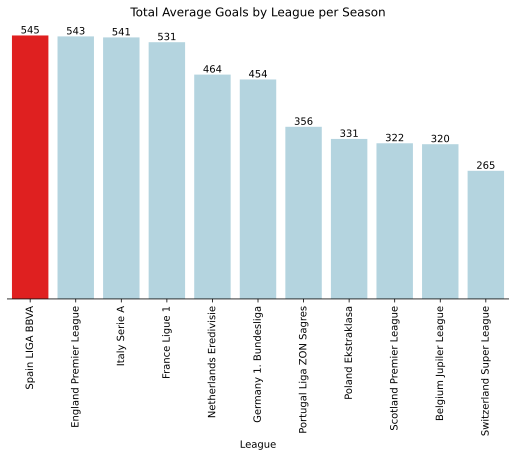

In [31]:
# visualizing the leagues with the highest and lowest scoring
fig, ax = plt.subplots(figsize=(9,5))
best_league = l_scores_per_season.loc[l_scores_per_season['per_season'].idxmax(), 'league']
colors = ['lightblue' if league != best_league else 'red' for league in l_scores_per_season['league']]
sns.barplot(data=l_scores_per_season, x='league', y='per_season', palette=colors)
ax.bar_label(ax.containers[0])    
ax.axes.get_yaxis().set_visible(False)
sns.despine(top=True, left=True, bottom=False)
plt.xlabel('League')
plt.title('Total Average Goals by League per Season')
plt.xticks(rotation=90)
plt.show()


Spain LIGA BBVA scores the most goals, per season and Switzerland Super League scores the least. Based on the scoring results, Spain, England, and Italy leagues should be the first choise for betting options due to the higher potential to attract betters interest.

## II.3.1	Who are the top scorers in each team and league? 

In [32]:
scorers = player_goal_table.groupby(['league','team_short',
                              'player']).agg(seasons=('season',
                                                          'nunique'),goals=('scored',
                                                                            'count')).reset_index()
scorers['per_season'] = scorers['goals'] / scorers['seasons']
scorers['per_season'] = scorers['per_season'].round(1)
scorers = scorers.sort_values(by='goals', ascending=False)
scorers.head(11)


,league,team_short,player,seasons,goals,per_season
5135,Spain LIGA BBVA,BAR,Lionel Messi,8,295,36.9
5827,Spain LIGA BBVA,REA,Cristiano Ronaldo,7,270,38.6
4519,Italy Serie A,UDI,Antonio Di Natale,8,156,19.5
661,England Premier League,MUN,Wayne Rooney,8,135,16.9
2006,France Ligue 1,PSG,Zlatan Ibrahimovic,4,120,30.0
5848,Spain LIGA BBVA,REA,Karim Benzema,7,113,16.1
2910,Germany 1. Bundesliga,LEV,Stefan Kiessling,8,112,14.0
590,England Premier League,MCI,Sergio Aguero,5,105,21.0
5837,Spain LIGA BBVA,REA,Gonzalo Higuain,5,100,20.0
2302,Germany 1. Bundesliga,BMU,Thomas Mueller,7,94,13.4


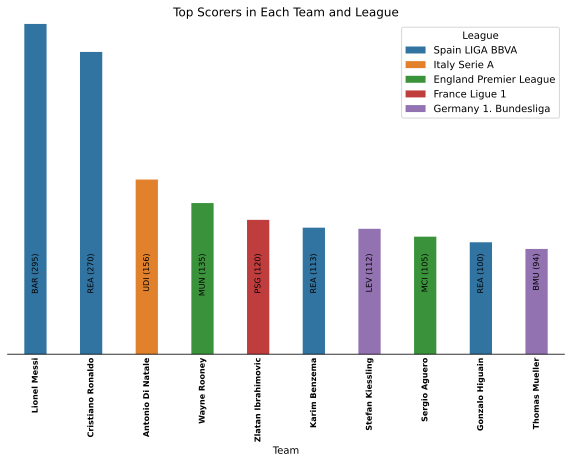

In [33]:
top_scorers = scorers.head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_scorers, x='player', y='goals', hue='league', errcolor='None', 
                 width=0.4, dodge=False)

for i, scorer in enumerate(top_scorers.head(10).iterrows()):
    ax.text(i, 90, f"{scorer[1]['team_short']} ({scorer[1]['goals']})", ha='center', va='top',
            color='black', rotation='vertical', fontsize=8)

plt.xlabel('Team')
ax.axes.get_yaxis().set_visible(False)
plt.title('Top Scorers in Each Team and League')
plt.tick_params(axis='both', labelsize=8)
plt.legend(title='League')
sns.despine(top=True, left=True, bottom=False)
ax.set_ylim(top=top_scorers['goals'].max() + 1.5)
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
ax.tick_params(axis='x', size=0)
plt.xticks(rotation=90)
plt.show()

## II.3.2 Identify, which team scores the most in what season. 

In [34]:
season_scores = team_goal_table.groupby(['season', 'team_short'])['scored'].sum().reset_index()
max_scores = season_scores.groupby('season').apply(lambda x: x.loc[x['scored'].idxmax()])
max_scores = max_scores.sort_values(by='scored', ascending=True)

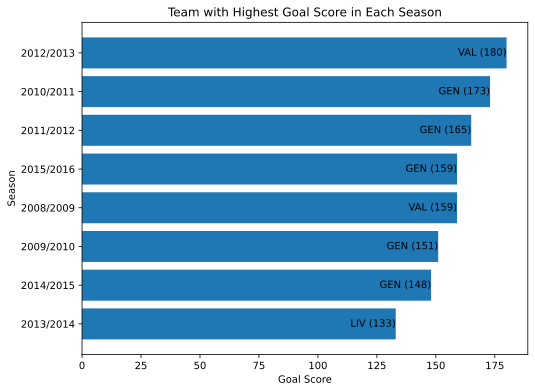

In [35]:
plt.figure(figsize=(8, 6))
plt.barh(max_scores['season'], max_scores['scored'])
plt.xlabel('Goal Score')
plt.ylabel('Season')
plt.title('Team with Highest Goal Score in Each Season')

for i, season in enumerate(max_scores['season']):
    team_name = max_scores.iloc[i, max_scores.columns.get_loc('team_short')]
    goal_score = max_scores.iloc[i, max_scores.columns.get_loc('scored')]
    plt.text(goal_score, season, f"{team_name} ({goal_score})", ha='right', va='center')

plt.show()


## II.3.3 Finding the composition of the top scoring season teams


In [36]:
team_composition = pd.DataFrame(columns=['season', 'team', 'player'])
for season in max_scores['season']:
    season_team = max_scores.loc[max_scores['season'] == season, 'team_short'].values[0]
    team_goal_temp = player_goal_table[(player_goal_table['team_short'] == season_team) & 
                            (player_goal_table['season'] == season)]
    player_composition = team_goal_temp['player'].unique()
    for players in player_composition:
        team_composition = pd.concat([team_composition, pd.DataFrame({'season':[season],
                                                                     'team':[season_team],
                                                                     'player':[players]})])

In [37]:
# eg. of viewing team composition of the most scoring season team
team_composition[team_composition['season']=='2013/2014']

,season,team,player
0,2013/2014,LIV,Steven Gerrard
0,2013/2014,LIV,Daniel Sturridge
0,2013/2014,LIV,Glen Johnson
0,2013/2014,LIV,Kolo Toure
0,2013/2014,LIV,Daniel Agger
0,2013/2014,LIV,Martin Skrtel
0,2013/2014,LIV,Jordan Henderson
0,2013/2014,LIV,Victor Moses
0,2013/2014,LIV,Luis Suarez
0,2013/2014,LIV,Joe Allen


## II.4.1	How many teams are in each league? 

In [38]:
home_team_data = match[['league_id', 'home_team_api_id']].copy()
home_team_data.rename(columns={'home_team_api_id': 'team_api_id'}, inplace=True)
away_team_data = match[['league_id', 'away_team_api_id']].copy()
away_team_data.rename(columns={'away_team_api_id': 'team_api_id'}, inplace=True)
team_league = pd.concat([home_team_data, away_team_data], 
                        ignore_index=True).drop_duplicates(subset=['league_id', 'team_api_id'])

In [39]:
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [40]:
team_league_names = team_league.merge(team[['team_api_id', 'team_long_name']], on='team_api_id',
                                      how='left')
team_league_names = team_league_names.merge(league[['id', 'name']], left_on='league_id', right_on='id', how='left')
team_league_names.drop(['team_api_id', 'id'], axis=1, inplace=True)
team_league_names.rename(columns={'team_long_name': 'team_name', 'name': 'league_name'}, inplace=True)


In [41]:
league_size = team_league_names.groupby('league_name')['team_name'].nunique().reset_index()
league_size.rename(columns={'team_name':'nr_of_teams'}, inplace=True)
league_size.to_csv('league_size.csv', index=False)

The visual can be found by this link:
https://lookerstudio.google.com/s/lN7ZC_e9PCs

## II.4.2	How many wins/losses different teams have? 

In [42]:
win_loss = match[['home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']].copy()
win_loss = win_loss.merge(team[['team_api_id', 'team_short_name']], left_on='home_team_api_id', 
                          right_on='team_api_id', how='left')
win_loss.rename(columns={'short_name': 'home_team_short_name'}, inplace=True)
win_loss.drop('team_api_id', axis=1, inplace=True)

win_loss = win_loss.merge(team[['team_api_id', 'team_short_name']], left_on='away_team_api_id', 
                          right_on='team_api_id', how='left')
win_loss.rename(columns={'short_name': 'away_team_short_name'}, inplace=True)
win_loss.drop(['team_api_id','home_team_api_id','away_team_api_id'], axis=1, inplace=True)

In [90]:
win_loss['winner'] = win_loss.apply(lambda row: row['team_short_name_x'] if row['home_team_goal'] > row['away_team_goal']
                                    else row['team_short_name_y'], axis=1)
win_loss['loser'] = win_loss.apply(lambda row: row['team_short_name_x'] if row['home_team_goal'] < row['away_team_goal']
                                   else row['team_short_name_y'], axis=1)
team_stats = pd.DataFrame()
team_stats['team_name'] = pd.concat([win_loss['winner'], win_loss['loser']], ignore_index=True)
team_stats['result'] = pd.concat([pd.Series('win', index=range(len(win_loss))),
                                  pd.Series('loss', index=range(len(win_loss)))],
                                 ignore_index=True)
team_stats = team_stats.groupby(['team_name', 'result']).size().unstack(fill_value=0).reset_index()
team_stats.rename(columns={'win': 'nr. of wins', 'loss': 'nr. of losses'}, inplace=True)
sorted_teams = team_stats.sort_values(['nr. of wins', 'nr. of losses'], ascending=[False, True])
top_winners = sorted_teams.head(5)
top_losers = sorted_teams.tail(5)
combined_teams = pd.concat([top_winners, top_losers], ignore_index=True)
shuffled_teams = combined_teams.sample(frac=1).reset_index(drop=True)
shuffled_teams.reset_index(drop=True, inplace=True)
shuffled_teams.to_csv('top_teams.csv', index=False)

shuffled_teams


result,team_name,nr. of losses,nr. of wins
0,PEN,26,9
1,GEN,337,418
2,MAR,251,311
3,MON,278,316
4,PES,31,9
5,DUN,26,8
6,CEL,137,310
7,ARL,29,8
8,VAL,344,338
9,FEI,18,7


The visual can be found by this link:
https://lookerstudio.google.com/s/pXLoneCvc14

## II.4.3	The factors that correlate with the player's ability to score.

In [44]:
player_attr_new['date'] = pd.to_datetime(player_attr_new['date'])
filtered_players = player_attr_new
cols_to_drop = ['id', 'player_fifa_api_id']
filtered_players = filtered_players.drop(columns = cols_to_drop)
foot_map = {'right':1, 'left':0}
attack_map = {'high':3, 'medium':2,'low':1,'None':0}
defensive_map = {"high": 2,"medium": 1,"low": 0,"9": 2,"8": 2,"7": 2,"6": 1,"5": 1,"4": 1,
                     "3": 1,"2": 0,"1": 0}
maps = [foot_map, attack_map, defensive_map]
columns_to_map = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
for column, mapping in zip(columns_to_map, maps):
    filtered_players[column] = filtered_players[column].replace(mapping)
filtered_players = filtered_players.sort_values(by='player_api_id', ascending=False)
filtered_players['preferred_foot'] = filtered_players['preferred_foot'].astype('category').cat.codes.astype(float)
filtered_players['attacking_work_rate'] = filtered_players['attacking_work_rate'].astype('category').cat.codes.astype(float)
filtered_players['defensive_work_rate'] = filtered_players['defensive_work_rate'].astype('category').cat.codes.astype(float)

In [45]:
attributes = ['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 
              'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 
              'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 
              'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 
              'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 
              'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 
              'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']
grouped_player_attr = (filtered_players.groupby('player_api_id')[attributes].mean().reset_index())

In [46]:
player_goal_sum = player_goal.groupby('player_id')['goal_scored'].sum().reset_index()
grouped_player_attr = grouped_player_attr.merge(player_goal_sum, left_on='player_api_id',
                                                right_on='player_id', how='left')

grouped_player_attr = grouped_player_attr.dropna()

In [47]:
correlation_df = grouped_player_attr[['goal_scored', 'overall_rating', 'potential', 'preferred_foot', 
                                      'attacking_work_rate','defensive_work_rate', 'crossing', 
                                      'finishing', 'heading_accuracy', 'short_passing','volleys', 
                                      'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 
                                      'ball_control','acceleration', 'sprint_speed', 'agility', 
                                      'reactions', 'balance', 'shot_power','jumping', 'stamina', 
                                      'strength', 'long_shots', 'aggression', 'interceptions',
                                      'positioning', 'vision', 'penalties', 'marking', 
                                      'standing_tackle', 'sliding_tackle','gk_diving', 'gk_handling', 
                                      'gk_kicking', 'gk_positioning', 'gk_reflexes']].corr()
goal_scored_corr = correlation_df['goal_scored'].copy().reset_index()
goal_scored_corr.to_csv('goal_scored_corr.csv', index=False)

Visual with the goal scored correlation to players attributes can be found by this link:
https://lookerstudio.google.com/s/jBWEX99PFSA

# IV. Statistical Inference
I will use statistical inference to answer the following question: 

Is there such a thing as home advantage?

Null Hypothesis (H0): There is no significant difference between the performance of teams playing at home and teams playing away.

Alternative Hypothesis (HA): There is a significant difference between the performance of teams playing at home and teams playing away.

I set the confidence level to 95% for this test.

In [48]:
#creating a new data frame with needed values
home_away = match[['match_api_id', 'home_team_goal', 'away_team_goal']]
home_away = home_away.copy()
home_away.loc[home_away['home_team_goal'] > home_away['away_team_goal'], 'winner'] = 'home'
home_away.loc[home_away['home_team_goal'] < home_away['away_team_goal'], 'winner'] = 'away'
home_away.loc[home_away['home_team_goal'] == home_away['away_team_goal'], 'winner'] = 'draw'
home_away.head()

,match_api_id,home_team_goal,away_team_goal,winner
0,492473,1,1,draw
1,492474,0,0,draw
2,492475,0,3,away
3,492476,5,0,home
4,492477,1,3,away


In [49]:
home_goals = home_away['home_team_goal']
away_goals = home_away['away_team_goal']

t_statistic, p_value = ttest_ind(home_goals, away_goals, equal_var=False)

confidence_level = 0.95
alpha = 1 - confidence_level
df = len(home_goals) + len(away_goals) - 2
t_critical = t.ppf(1 - alpha / 2, df)
avg_goals_home = home_goals.mean()
avg_goals_away = away_goals.mean()
mean_difference = avg_goals_home - avg_goals_away
std_difference = np.sqrt(np.var(home_goals) / len(home_goals) + np.var(away_goals) / len(away_goals))
lower_bound = mean_difference - t_critical * std_difference
upper_bound = mean_difference + t_critical * std_difference

rounded_p_value = "{:.5f}".format(p_value)
rounded_lower_bound = "{:.2f}".format(lower_bound)
rounded_upper_bound = "{:.2f}".format(upper_bound)

print("Results:")
print("-------")
print(f"Average goals scored at home: {avg_goals_home:.2f}")
print(f"Average goals scored away: {avg_goals_away:.2f}")
print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {rounded_p_value}")
print(f"Confidence interval ({confidence_level * 100}%): ({rounded_lower_bound}, {rounded_upper_bound})")


Results:
-------
Average goals scored at home: 1.54
Average goals scored away: 1.16
t-statistic: 35.78
p-value: 0.00000
Confidence interval (95.0%): (0.36, 0.40)


Based on the analysis result, since the the p value is close to 0 and the confidence interval does not contain 0, with the 95% of confidence, and I can reject the null hypothesis. 

Thus, there is a significant difference between teams playing home and away in the goals scored. There is home advantage. Trying to predict the game result, the factor or home/away should be well considered.

# V.	Machine learning modeling to predict the number of goals scored and the outcome of the game.

To prepare the model for predicting, I will be generating some additional features, both, for the team and for the player. I will create a new features, called - scoring probabilities. In addition, using correlation, I will identify the team and player attributes, which should influence scoring capabilities.


In [50]:
# first, I will complete the team conposition generation because this would be important parameter 
# assigning players' scoring probability to particular team.

team_composition2 = []

for index, row in match.iterrows():
    season = row['season']
    home_team = row['home_team_api_id']
    away_team = row['away_team_api_id']
    
    home_players = [row[f'home_player_{i}'] for i in range(1, 12) if pd.notnull(row[f'home_player_{i}'])]
    away_players = [row[f'away_player_{i}'] for i in range(1, 12) if pd.notnull(row[f'away_player_{i}'])]
    
    home_records = [{'season': season, 'team': home_team, 'player': players} for players in home_players]
    away_records = [{'season': season, 'team': away_team, 'player': players} for players in away_players]
    
    team_composition2.extend(home_records + away_records)

team_composition2 = pd.DataFrame(team_composition2)

In [51]:
team_composition2 = team_composition2.merge(player[['player_api_id', 'player_name']],
                                            left_on='player', right_on='player_api_id', how='left')
team_composition2 = team_composition2.merge(team[['team_api_id', 'team_long_name', 'team_short_name']],
                                            left_on='team', right_on='team_api_id', how='left')

team_composition2.drop(['player', 'team', 'player_api_id', 'team_long_name','team_api_id'], axis=1, inplace=True)
team_composition2.rename(columns={ 'team_short_name': 'team','player_name': 'player'},
                         inplace=True)

In [52]:
# combining two dataframes to create a complete one.
combined_team_composition = pd.concat([team_composition, team_composition2])
combined_team_composition = combined_team_composition.drop_duplicates(subset=['season', 'team', 'player'])

combined_team_composition.reset_index(drop=True, inplace=True)

In [53]:
#converting date column to data format
match['date'] = pd.to_datetime(match['date'])
filtered_matches = match

In [54]:
grouped_player_attr.head()

,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_id,goal_scored
1,2752,69.380952,70.380952,1.0,2.000000,1.000000,36.428571,37.428571,75.333333,54.809524,20.428571,44.857143,30.428571,18.857143,59.571429,55.571429,41.619048,42.190476,43.333333,60.857143,44.571429,57.428571,56.523810,60.904762,82.238095,19.571429,80.285714,71.428571,31.428571,52.428571,35.428571,71.095238,70.666667,65.571429,11.095238,6.095238,7.095238,9.095238,15.095238,2752.0,8.0
2,2768,69.285714,70.571429,0.0,2.000000,1.000000,42.238095,42.761905,66.666667,64.714286,28.761905,40.238095,51.761905,20.047619,57.000000,56.380952,56.952381,58.904762,58.047619,69.809524,60.190476,38.761905,76.904762,59.285714,67.428571,19.428571,62.761905,74.714286,44.190476,57.761905,31.904762,71.666667,70.619048,79.714286,10.761905,15.904762,22.714286,15.142857,12.095238,2768.0,3.0
6,2802,76.318182,78.863636,1.0,2.590909,0.954545,77.181818,72.636364,55.727273,71.636364,68.272727,83.090909,80.090909,75.681818,69.590909,80.045455,81.000000,79.772727,84.272727,71.863636,75.954545,75.227273,66.090909,64.090909,53.909091,76.727273,54.545455,52.909091,74.318182,76.181818,71.363636,38.863636,43.045455,36.000000,11.863636,16.909091,23.000000,11.500000,9.954545,2802.0,24.0
7,2805,72.535714,77.821429,1.0,2.000000,1.000000,54.392857,41.535714,53.821429,75.000000,26.321429,55.535714,56.750000,57.142857,68.857143,68.964286,67.535714,66.857143,65.500000,75.035714,69.500000,71.714286,72.642857,77.035714,75.071429,62.071429,78.214286,80.250000,57.857143,74.071429,52.107143,57.857143,76.214286,63.357143,10.107143,9.285714,18.785714,10.178571,15.535714,2805.0,1.0
9,2862,72.911765,74.558824,0.0,3.000000,1.000000,68.264706,65.882353,60.000000,70.294118,69.852941,76.794118,70.617647,68.823529,64.911765,75.205882,83.558824,84.205882,87.088235,72.794118,72.352941,73.323529,81.911765,59.382353,60.911765,68.323529,49.058824,43.264706,69.764706,70.882353,73.058824,22.500000,23.735294,22.794118,9.911765,15.676471,18.676471,11.647059,8.705882,2862.0,2.0


In [55]:
filtered_goals = player_goal
filtered_goals['date'] = pd.to_datetime(filtered_goals['date'])
filtered_goals.head()

,season,date,league_id,country_id,player_id,team_id,goal_scored
0,2008/2009,2008-08-17,1729,1729,37799,10261,1
1,2008/2009,2008-08-17,1729,1729,24148,10260,1
2,2008/2009,2008-08-16,1729,1729,26181,9825,1
3,2008/2009,2008-08-16,1729,1729,30853,8650,1
4,2008/2009,2008-08-16,1729,1729,23139,8654,1


In [98]:
'''player_attr_new['date'] = pd.to_datetime(player_attr_new['date'])
filtered_players = player_attr_new
cols_to_drop = ['id', 'player_fifa_api_id']
filtered_players = filtered_players.drop(columns = cols_to_drop)
foot_map = {'right':1, 'left':0}
attack_map = {'high':3, 'medium':2,'low':1,'None':0}
defensive_map = {"high": 2,"medium": 1,"low": 0,"9": 2,"8": 2,"7": 2,"6": 1,"5": 1,"4": 1,
                     "3": 1,"2": 0,"1": 0}
maps = [foot_map, attack_map, defensive_map]
columns_to_map = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
for column, mapping in zip(columns_to_map, maps):
    filtered_players[column] = filtered_players[column].replace(mapping)
filtered_players = filtered_players.sort_values(by='player_api_id', ascending=False)'''
filtered_players['goals_scored'] = filtered_players.apply(
    lambda row: filtered_goals[(filtered_goals['date'] <= row['date']) & 
                               (filtered_goals['player_id'] == 
                                row['player_api_id'])]['goal_scored'].sum(), axis=1)

In [57]:
filtered_players.head()

,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,goals_scored
8085,750584,2016-05-19,58.0,66.0,1.0,2.0,1.0,47.0,39.0,53.0,60.0,37.0,54.0,40.0,45.0,55.0,56.0,63.0,60.0,51.0,54.0,76.0,59.0,58.0,55.0,57.0,38.0,62.0,56.0,41.0,47.0,52.0,56.0,66.0,62.0,8.0,9.0,13.0,11.0,13.0,0
8086,750584,2007-02-22,58.0,66.0,1.0,2.0,1.0,47.0,39.0,53.0,60.0,37.0,54.0,40.0,45.0,55.0,56.0,63.0,60.0,51.0,54.0,76.0,59.0,58.0,55.0,57.0,38.0,62.0,56.0,41.0,47.0,52.0,56.0,66.0,62.0,8.0,9.0,13.0,11.0,13.0,0
147408,750435,2016-04-14,60.0,74.0,1.0,2.0,0.0,35.0,57.0,55.0,60.0,52.0,63.0,56.0,37.0,54.0,59.0,79.0,76.0,66.0,61.0,78.0,57.0,58.0,57.0,46.0,50.0,34.0,13.0,59.0,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0,0
147409,750435,2016-02-11,56.0,70.0,1.0,2.0,0.0,35.0,57.0,55.0,60.0,52.0,58.0,56.0,37.0,54.0,56.0,64.0,62.0,66.0,61.0,78.0,57.0,58.0,57.0,46.0,50.0,34.0,13.0,56.0,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0,0
147410,750435,2016-02-04,56.0,70.0,1.0,2.0,0.0,35.0,57.0,55.0,60.0,52.0,58.0,56.0,37.0,54.0,56.0,64.0,62.0,66.0,61.0,78.0,57.0,58.0,57.0,46.0,50.0,34.0,13.0,56.0,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0,0


In [58]:
correlation_matrix = filtered_players.corr(numeric_only=True)
correlation_with_goals = correlation_matrix['goals_scored'].sort_values(ascending=False)
positive_correlations = correlation_with_goals[(correlation_with_goals >= 0.2) & 
                                             (correlation_with_goals < 1)]
positive_correlations

overall_rating        0.396211
reactions             0.354808
volleys               0.353650
finishing             0.347945
penalties             0.319377
positioning           0.310243
ball_control          0.291312
shot_power            0.289717
long_shots            0.289214
curve                 0.284034
potential             0.278970
dribbling             0.267241
vision                0.260514
short_passing         0.257232
free_kick_accuracy    0.247631
crossing              0.219561
heading_accuracy      0.212484
Name: goals_scored, dtype: float64

In [64]:
attributes_for_probability = ['finishing', 'overall_rating', 'volleys', 'penalties', 'reactions', 
                              'positioning', 'ball_control', 'shot_power', 'long_shots', 'curve', 
                              'dribbling', 'potential', 'vision', 'free_kick_accuracy', 
                              'short_passing', 'crossing', 'heading_accuracy']

player_data = filtered_players[['goals_scored'] + attributes_for_probability].copy()
train_data, test_data = train_test_split(player_data, test_size=0.3, random_state=25)
X_train = train_data[attributes_for_probability]
y_train = train_data['goals_scored']
X_test = test_data[attributes_for_probability]
y_test = test_data['goals_scored']
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
filtered_players['scoring_probability'] = logreg.predict_proba(
   filtered_players[attributes_for_probability])[:, 1]

In [65]:
# accuracy check for the newly generated attribute
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the scoring probability prediction: {accuracy*100:.2f} %")

Accuracy of the scoring probability prediction: 67.14 %


The accuracy of the player scoring probability is 67%. I will use this new attribute for the calculation of team scoring prediction and match outcome.

In [66]:
# creating a player scoring probability table for convenient merging.
player_scoring_probability = filtered_players.groupby('player_api_id')['scoring_probability'].mean()
player_scoring_probability = player_scoring_probability.to_frame().reset_index()

In [67]:
player_scoring_probability.head()

,player_api_id,scoring_probability
0,2625,0.132979
1,2752,0.144976
2,2768,0.116133
3,2770,0.064491
4,2790,0.080149


In [68]:
filtered_team_goals = team_goals
filtered_team_goals['date'] = pd.to_datetime(team_goals['date'])
filtered_team_goals.head()

,season,date,league_id,country_id,team_id,goal_scored
0,2008/2009,2008-08-17,1,1,9987,1
1,2008/2009,2008-08-17,1,1,9987,1
2,2008/2009,2008-08-16,1,1,9984,0
3,2008/2009,2008-08-17,1,1,9991,5
4,2008/2009,2008-08-16,1,1,7947,1


In [69]:
team_attributes_new['date'] = pd.to_datetime(team_attributes_new['date'])
filtered_teams = team_attributes_new
cols_to_drop = ['id', 'team_fifa_api_id', 'date', 'buildUpPlaySpeedClass', 'buildUpPlayPassingClass',
               'chanceCreationPassingClass','chanceCreationCrossingClass',
                'chanceCreationShootingClass','defencePressureClass','defenceAggressionClass',
               'defenceTeamWidthClass', 'buildUpPlayDribblingClass']
filtered_teams = filtered_teams.drop(columns = cols_to_drop)
organaized_free_mapping = {'Organised': 1, 'Free Form': 0}
defence_mapping = {'Cover': 1, 'Offside Trap': 0}
filtered_teams['buildUpPlayPositioningClass'] = (
    filtered_teams['buildUpPlayPositioningClass'].replace(organaized_free_mapping))
filtered_teams['chanceCreationPositioningClass'] = (
    filtered_teams['chanceCreationPositioningClass'].replace(organaized_free_mapping))
filtered_teams['defenceDefenderLineClass'] = (
    filtered_teams['defenceDefenderLineClass'].replace(defence_mapping))
filtered_teams['goals_scored'] = filtered_teams.apply(
    lambda row: filtered_team_goals[(filtered_team_goals['team_id'] == row['team_api_id'])]['goal_scored'].sum(), 
    axis=1
)
filtered_teams.head()

,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,chanceCreationPositioningClass,defencePressure,defenceAggression,defenceTeamWidth,defenceDefenderLineClass,goals_scored
0,9930,60,31.0,50,1,60,65,55,1,50,55,45,1,158
1,9930,52,48.0,56,1,54,63,64,1,47,44,54,1,158
2,9930,47,41.0,54,1,54,63,64,1,47,44,54,1,158
3,8485,70,32.0,70,1,70,70,70,1,60,70,70,1,289
4,8485,47,32.0,52,1,53,48,52,1,47,47,52,1,289


In [70]:
# Random Forest Regression modeling
attributes_for_probability = ['buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing', 
                              'buildUpPlayPositioningClass', 'chanceCreationPassing', 
                              'chanceCreationCrossing', 'chanceCreationShooting', 
                              'chanceCreationPositioningClass', 'defencePressure', 
                              'defenceAggression', 'defenceTeamWidth', 'defenceDefenderLineClass']
team_data = filtered_teams[['goals_scored'] + attributes_for_probability].copy()
train_data, test_data = train_test_split(team_data, test_size=0.2, random_state=42)
X_train = train_data[attributes_for_probability]
y_train = train_data['goals_scored']
X_test = test_data[attributes_for_probability]
y_test = test_data['goals_scored']
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
filtered_teams['scoring_probability'] = rf.predict(filtered_teams[attributes_for_probability])
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(player_scoring_probability.values.reshape(-1, 1))
min_value = filtered_teams['scoring_probability'].min()
max_value = filtered_teams['scoring_probability'].max()
filtered_teams['scoring_probability'] = (filtered_teams['scoring_probability'] - 
                                         min_value) / (max_value - min_value)

filtered_teams.head()

,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,chanceCreationPositioningClass,defencePressure,defenceAggression,defenceTeamWidth,defenceDefenderLineClass,goals_scored,scoring_probability
0,9930,60,31.0,50,1,60,65,55,1,50,55,45,1,158,0.243488
1,9930,52,48.0,56,1,54,63,64,1,47,44,54,1,158,0.181245
2,9930,47,41.0,54,1,54,63,64,1,47,44,54,1,158,0.187981
3,8485,70,32.0,70,1,70,70,70,1,60,70,70,1,289,0.357985
4,8485,47,32.0,52,1,53,48,52,1,47,47,52,1,289,0.322629


In [71]:
# accuracy check for the newly generated attribute 
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 of the scoring probability prediction: {r2:.2f}")

R2 of the scoring probability prediction: 0.38


In [72]:
#logistics regression modeling for scoring probability
attributes_for_probability = ['buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing', 
                              'buildUpPlayPositioningClass', 'chanceCreationPassing', 
                              'chanceCreationCrossing', 'chanceCreationShooting', 
                              'chanceCreationPositioningClass', 'defencePressure', 
                              'defenceAggression', 'defenceTeamWidth', 'defenceDefenderLineClass']
team_data = filtered_teams[['goals_scored'] + attributes_for_probability].copy()
train_data, test_data = train_test_split(team_data, test_size=0.2, random_state=42)
X_train = train_data[attributes_for_probability]
y_train = train_data['goals_scored']
X_test = test_data[attributes_for_probability]
y_test = test_data['goals_scored']
linear_reg = LinearRegression()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy (Logistic Regression): {accuracy_logreg * 100:.2f}%")

Accuracy (Logistic Regression): 6.16%


None of the models performed well in predicting teams scoring probability. Thus this attribute will not be used in modeling the number of goals scored and match result.

In [73]:
# dropping unecesary columns for future modeling
cols_to_drop = ['id', 'country_id', 'league_id', 'stage', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5',
                  'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5',
                  'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5',
                  'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5',
                  'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
                  'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
                  'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10',
                  'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
                  'home_player_X11', 'home_player_Y11', 'away_player_X11', 'away_player_Y11','B365H', 'B365D', 
                'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 
                'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 
                'BSA','goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession']
filtered_matches = filtered_matches.drop(columns = cols_to_drop)

In [74]:
# cleaning merged_table from unecesary columns
merged_table = filtered_matches.merge(filtered_teams, left_on='home_team_api_id', 
                                    right_on='team_api_id', how='left')
merged_table = merged_table.merge(filtered_teams, left_on='away_team_api_id', 
                                  right_on='team_api_id', how='left')
merged_table.rename(columns={'scoring_probability': 'away_team_scoring_probability'}, inplace=True)

merged_table.drop(['team_api_id_x', 'team_api_id_y', 'scoring_probability_x',
                   'scoring_probability_y', 'goals_scored_x', 'goals_scored_y'], axis=1, inplace=True)
merged_table.rename(columns=lambda x: x.replace('_x', '_home'), inplace=True)
merged_table.rename(columns=lambda x: x.replace('_y', '_away'), inplace=True)

In [75]:
# removing the rows that do not contains player ids
merged_table.dropna(inplace=True)

In [76]:
player_columns = ['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6', 
                  'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11', 
                  'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5', 
                  'away_player_6','away_player_7', 'away_player_8', 'away_player_9', 'away_player_10',
                  'away_player_11']
for column in player_columns:
    merged_table = merged_table.merge(player_scoring_probability, left_on=column,
                                      right_on='player_api_id', how='left')
    merged_table[column] = merged_table['scoring_probability']
    merged_table.drop('player_api_id', axis=1, inplace=True)
    merged_table = merged_table.rename(columns={'scoring_probability': 
                                                f'{column}_scoring_probability'})
    merged_table.drop(column, axis=1, inplace=True)

In [77]:
merged_table.fillna(0, inplace=True)

In [78]:
merged_table.head()

,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,buildUpPlaySpeed_home,buildUpPlayDribbling_home,buildUpPlayPassing_home,buildUpPlayPositioningClass_home,chanceCreationPassing_home,chanceCreationCrossing_home,chanceCreationShooting_home,chanceCreationPositioningClass_home,defencePressure_home,defenceAggression_home,defenceTeamWidth_home,defenceDefenderLineClass_home,buildUpPlaySpeed_away,buildUpPlayDribbling_away,buildUpPlayPassing_away,buildUpPlayPositioningClass_away,chanceCreationPassing_away,chanceCreationCrossing_away,chanceCreationShooting_away,chanceCreationPositioningClass_away,defencePressure_away,defenceAggression_away,defenceTeamWidth_away,defenceDefenderLineClass_away,home_player_1_scoring_probability,home_player_2_scoring_probability,home_player_3_scoring_probability,home_player_4_scoring_probability,home_player_5_scoring_probability,home_player_6_scoring_probability,home_player_7_scoring_probability,home_player_8_scoring_probability,home_player_9_scoring_probability,home_player_10_scoring_probability,home_player_11_scoring_probability,away_player_1_scoring_probability,away_player_2_scoring_probability,away_player_3_scoring_probability,away_player_4_scoring_probability,away_player_5_scoring_probability,away_player_6_scoring_probability,away_player_7_scoring_probability,away_player_8_scoring_probability,away_player_9_scoring_probability,away_player_10_scoring_probability,away_player_11_scoring_probability
0,2008/2009,2009-02-27,493017,8203,9987,2,1,65.0,32.0,60.0,1.0,50.0,40.0,50.0,1.0,60.0,70.0,60.0,1.0,45.0,30.0,45.0,1.0,50.0,35.0,60.0,1.0,70.0,65.0,70.0,1.0,0.110689,0.106068,0.090125,0.099904,0.054585,0.080937,0.071165,0.104502,0.052498,0.060697,0.0367,0.068514,0.088324,0.050445,0.077996,0.114149,0.084361,0.093516,0.094501,0.060064,0.060239,0.025959
1,2008/2009,2009-02-27,493017,8203,9987,2,1,65.0,32.0,60.0,1.0,50.0,40.0,50.0,1.0,60.0,70.0,60.0,1.0,66.0,32.0,52.0,1.0,65.0,66.0,51.0,1.0,48.0,47.0,54.0,0.0,0.110689,0.106068,0.090125,0.099904,0.054585,0.080937,0.071165,0.104502,0.052498,0.060697,0.0367,0.068514,0.088324,0.050445,0.077996,0.114149,0.084361,0.093516,0.094501,0.060064,0.060239,0.025959
2,2008/2009,2009-02-27,493017,8203,9987,2,1,65.0,32.0,60.0,1.0,50.0,40.0,50.0,1.0,60.0,70.0,60.0,1.0,53.0,28.0,55.0,1.0,55.0,48.0,56.0,1.0,47.0,45.0,55.0,1.0,0.110689,0.106068,0.090125,0.099904,0.054585,0.080937,0.071165,0.104502,0.052498,0.060697,0.0367,0.068514,0.088324,0.050445,0.077996,0.114149,0.084361,0.093516,0.094501,0.060064,0.060239,0.025959
3,2008/2009,2009-02-27,493017,8203,9987,2,1,65.0,32.0,60.0,1.0,50.0,40.0,50.0,1.0,60.0,70.0,60.0,1.0,58.0,32.0,38.0,1.0,67.0,48.0,56.0,1.0,47.0,45.0,55.0,1.0,0.110689,0.106068,0.090125,0.099904,0.054585,0.080937,0.071165,0.104502,0.052498,0.060697,0.0367,0.068514,0.088324,0.050445,0.077996,0.114149,0.084361,0.093516,0.094501,0.060064,0.060239,0.025959
4,2008/2009,2009-02-27,493017,8203,9987,2,1,65.0,32.0,60.0,1.0,50.0,40.0,50.0,1.0,60.0,70.0,60.0,1.0,58.0,52.0,38.0,1.0,67.0,48.0,56.0,1.0,47.0,45.0,55.0,1.0,0.110689,0.106068,0.090125,0.099904,0.054585,0.080937,0.071165,0.104502,0.052498,0.060697,0.0367,0.068514,0.088324,0.050445,0.077996,0.114149,0.084361,0.093516,0.094501,0.060064,0.060239,0.025959


In [79]:
# Select the relevant columns for the regression model
home_columns = ['home_team_api_id', 'buildUpPlaySpeed_home', 'buildUpPlayDribbling_home', 'buildUpPlayPassing_home',
                'buildUpPlayPositioningClass_home', 'chanceCreationPassing_home', 'chanceCreationCrossing_home',
                'chanceCreationShooting_home', 'chanceCreationPositioningClass_home', 'defencePressure_home',
                'defenceAggression_home', 'defenceTeamWidth_home', 'defenceDefenderLineClass_home',
                'home_player_1_scoring_probability', 'home_player_2_scoring_probability',
                'home_player_3_scoring_probability', 'home_player_4_scoring_probability',
                'home_player_5_scoring_probability', 'home_player_6_scoring_probability',
                'home_player_7_scoring_probability', 'home_player_8_scoring_probability',
                'home_player_9_scoring_probability', 'home_player_10_scoring_probability',
                'home_player_11_scoring_probability']


away_columns = ['away_team_api_id','buildUpPlaySpeed_away', 'buildUpPlayDribbling_away', 'buildUpPlayPassing_away',
                'buildUpPlayPositioningClass_away', 'chanceCreationPassing_away', 'chanceCreationCrossing_away',
                'chanceCreationShooting_away', 'chanceCreationPositioningClass_away', 'defencePressure_away',
                'defenceAggression_away', 'defenceTeamWidth_away', 'defenceDefenderLineClass_away',
                'away_player_1_scoring_probability', 'away_player_2_scoring_probability',
                'away_player_3_scoring_probability', 'away_player_4_scoring_probability',
                'away_player_5_scoring_probability', 'away_player_6_scoring_probability',
                'away_player_7_scoring_probability', 'away_player_8_scoring_probability',
                'away_player_9_scoring_probability', 'away_player_10_scoring_probability',
                'away_player_11_scoring_probability']

X_home = merged_table[home_columns]
X_away = merged_table[away_columns]
y_home = merged_table['home_team_goal']
y_away = merged_table['away_team_goal']

# Split the data into training and testing sets
X_home_train, X_home_test, y_home_train, y_home_test = train_test_split(X_home, y_home, 
                                                                        test_size=0.2, random_state=42)
X_away_train, X_away_test, y_away_train, y_away_test = train_test_split(X_away, y_away, 
                                                                        test_size=0.2, random_state=42)

# Create and fit the linear regression models for home and away teams
home_model = LinearRegression()
away_model = LinearRegression()
home_model.fit(X_home_train, y_home_train)
away_model.fit(X_away_train, y_away_train)

# Make predictions on the test sets
home_predictions = home_model.predict(X_home_test)
away_predictions = away_model.predict(X_away_test)


home_test_data = pd.DataFrame({
    'home_team_api_id': X_home_test['home_team_api_id'],
    'actual_home_goals': y_home_test,
    'predicted_home_goals': home_predictions.round().astype(int)
})

away_test_data = pd.DataFrame({
    'away_team_api_id': X_away_test['away_team_api_id'],
    'actual_away_goals': y_away_test,
    'predicted_away_goals': away_predictions.round().astype(int)
})

home_test_data = home_test_data.reset_index(drop=True)
away_test_data = away_test_data.reset_index(drop=True)
prediction_data = pd.concat([home_test_data, away_test_data], axis=1)

In [80]:
prediction_data.head()

,home_team_api_id,actual_home_goals,predicted_home_goals,away_team_api_id,actual_away_goals,predicted_away_goals
0,8593,1,2,8640,3,1
1,8571,0,1,8635,2,1
2,8640,1,1,8674,1,1
3,9857,1,1,9885,2,1
4,8315,0,1,8634,1,2


Visually observing the prediction results one can clearly see that there is a significant mismatch betwen the actual goals and the predicted ones. To double check this asumption statistically, I will do statistical inference. 

Null Hypothesis (H0): There is no significant difference between the predicted goal scoring probabilities and the actual goal scoring results.

Alternative Hypothesis (Ha): There is a significant difference between the predicted goal scoring probabilities and the actual goal scoring results.

Confidence Interval: I will assume a confidence level of 95%.

In [105]:
# performing statistical hypothesis testing for home and away predicted result
home_difference = prediction_data['predicted_home_goals'] - prediction_data['actual_home_goals']
t_statistic_home, p_value_home = stats.ttest_rel(prediction_data['predicted_home_goals'], prediction_data['actual_home_goals'])

away_difference = prediction_data['predicted_away_goals'] - prediction_data['actual_away_goals']
t_statistic_away, p_value_away = stats.ttest_rel(prediction_data['predicted_away_goals'], prediction_data['actual_away_goals'])

alpha = 0.05
if p_value_home < alpha:
    print("Reject the null hypothesis for home team")
else:
    print("Fail to reject the null hypothesis for home team")

if p_value_away < alpha:
    print("Reject the null hypothesis for away team")
else:
    print("Fail to reject the null hypothesis for away team")

print(f"p-value for home team:{p_value_home:.5f}")
print(f"p-value for away team:{p_value_away:.5f}")

Fail to reject the null hypothesis for home team
Reject the null hypothesis for away team
p-value for home team:0.72186
p-value for away team:0.00000


In [93]:
# Bayesian Information Criterion
home_predictions = home_model.predict(X_home_train)
home_residuals = y_home_train - home_predictions
home_residual_variance = np.var(home_residuals)
home_n = len(X_home_train)
home_k = len(home_columns)
home_bic = home_n * np.log(home_residual_variance) + home_k * np.log(home_n)

away_predictions = away_model.predict(X_away_train)
away_residuals = y_away_train - away_predictions
away_residual_variance = np.var(away_residuals)
away_n = len(X_away_train)
away_k = len(away_columns)
away_bic = away_n * np.log(away_residual_variance) + away_k * np.log(away_n)

print(f"BIC for home model:{home_bic:.2f}")
print(f"BIC for away model:{away_bic:.2f}")


BIC for home model:269529.39
BIC for away model:134671.42


The p-value for the home team scoring is very high - 0.72, which proves the Null Hypothesis, meaning that we may use the model to predict the home team score.

On the other hand, away team goal prediction p value is close to 0, which sugests to reject the Null Hypthesis - and suggest that there is a significant difference, thus we cannot trus the model to predict away team goals.

Bayesian Information Criterion, on the other hand, is more in support for away team result accuracy. The model is complex, and even though BIC considers the complexity, the result it opposite to what statiscital inference results, but supports the accuracy tests.

In [97]:
# Comparing atual winners to predicted ones
prediction_data['actual_winner'] = np.where(prediction_data['actual_home_goals'] > 
                                            prediction_data['actual_away_goals'], 'home', 'away')
prediction_data['predicted_winner'] = np.where(prediction_data['predicted_home_goals'] > 
                                               prediction_data['predicted_away_goals'], 'home', 'away')
prediction_data['winner_difference'] = np.where(prediction_data['actual_winner'] == 
                                                prediction_data['predicted_winner'], 0, 1)
wrong_guess = prediction_data['winner_difference'].sum()
total_guess = len(prediction_data)
print(f'The model guessed {wrong_guess/total_guess*100:.2f}% of all guesses wrong')


The model guessed 44.68% of all guesses wrong


In [83]:
# additionally, calculate MSE and MAE for home team's predicted goals
mse_home = mean_squared_error(home_test_data['actual_home_goals'], 
                              home_test_data['predicted_home_goals']).round(2)
mae_home = mean_absolute_error(home_test_data['actual_home_goals'], 
                               home_test_data['predicted_home_goals']).round(2)

print("Home Team - Mean Squared Error:", mse_home)
print("Home Team - Mean Absolute Error:", mae_home)

Home Team - Mean Squared Error: 1.8
Home Team - Mean Absolute Error: 1.02


The model guessed almost 44% of game result incorectly, which is too high to rely on. In addition, guessing the score MAE is 1 and 1.8, which is a big variation for soccer games. Often, just 1 goal defines the winner.

I will additionally check, which league has the highest correct prediction rate. 

In [84]:
# adding league id and name to the prediction data table.
prediction_data = prediction_data.merge(team_league, left_on='home_team_api_id', 
                                        right_on='team_api_id', how='left')
prediction_data = prediction_data.merge(league[['id', 'name']], left_on='league_id', right_on='id', 
                                        how='left')
prediction_data.drop(['team_api_id'], axis=1, inplace=True)


In [85]:
prediction_data.drop(['league_id', 'id'], axis=1, inplace=True)
prediction_data.head()

,home_team_api_id,actual_home_goals,predicted_home_goals,away_team_api_id,actual_away_goals,predicted_away_goals,actual_winner,predicted_winner,winner_difference,name
0,8593,1,2,8640,3,1,away,home,1,Netherlands Eredivisie
1,8571,0,1,8635,2,1,away,away,0,Belgium Jupiler League
2,8640,1,1,8674,1,1,away,away,0,Netherlands Eredivisie
3,9857,1,1,9885,2,1,away,away,0,Italy Serie A
4,8315,0,1,8634,1,2,away,away,0,Spain LIGA BBVA


In [86]:
wrong_guesses = prediction_data[prediction_data['winner_difference'] == 1]
wrong_guesses_by_league = wrong_guesses.groupby('name').size().reset_index(name='wrong')

total_guesses = len(prediction_data)
total_guesses_by_league = prediction_data.groupby('name').size().reset_index(name='total')

wrong_guesses_by_league = wrong_guesses_by_league.merge(total_guesses_by_league, on='name', how='left')
wrong_guesses_by_league['% of wrong'] = (wrong_guesses_by_league['wrong'] / 
                                         wrong_guesses_by_league['total'] * 100).round(2)

wrong_guesses_by_league

,name,wrong,total,% of wrong
0,Belgium Jupiler League,2801,6208,45.12
1,England Premier League,8932,21214,42.10
2,France Ligue 1,9044,19169,47.18
3,Germany 1. Bundesliga,7725,16631,46.45
4,Italy Serie A,8356,18650,44.80
5,Netherlands Eredivisie,4853,10982,44.19
6,Poland Ekstraklasa,1064,2161,49.24
7,Portugal Liga ZON Sagres,2744,6321,43.41
8,Scotland Premier League,3868,8192,47.22
9,Spain LIGA BBVA,7725,18653,41.41


Based on the wrong guesses by leage analysis, Spain and Portugal leagues have the lowest % of wrong guesses. 


In [87]:
conn.close()

# 4. Conclusion

Betting companies trying to enter new sport area should prepare well before suggesting the odds to their customers. The goal of this project was to get acquainted with the European soccer specifications. I aimed to provide answer to number of questions, such as the composition of leagues, the number of goals scored by each league, top socrrers in the teams and leagues. In addition, I aimed to find out whether there is such a thing as home advantage. More than that, some of the key questions were about the prediction of the game results based on number of player and team attributes and their past performance.
The key question that I wanted to answer was if the database can help the company predict the outcome of the future matches accurately enough to adjust the accurate betting odds and thus, earn from the betting activity good margins. In addition, which league should the company focus on first to guarantee the interest from sport betters.

1.	After identifying the leagues, I have found out that Spain LIGA BBVA scores the most goals on average per season – 545. This is a good candidate of the league to focus first.
2.	Top scorrers were also in the Spain- Lionel Messi and Christiano Ronaldo. Another point for Spain league as the focus one for the initial betteing offers.
3.	Statistical inference helped to prove the hypothesis, that there is such a thing as a home advantage.
4.	The prediction of the goals scorred did not show good results. Home team scorring hypothesis testing suggested that we can trust the model to guess the number of goals scored. However, we cannot rely on away team accurate scoring prediction.
5.	Even worse results were generates to guess the winner of the game – the model guessed 44 % of the game outcome incorrectly. Applying model results to the leagues, again Spain and Portugal leagues had the best results.

Thus, concluding the project, I would suggest to start offering the clients to bet on Spain league, as it is the most attractive in terms of best players and highest number of goals. In addition, the result accuracy also supports the choise of this league. 



## 5. Recomendations
Since the data set ends with season 2015/2016 data, I would recommend using the most uptodate data to model the possible games outcomes. In addition, I would add other criterion to the analysis, such as weather conditions, time between games, traumas of players, red cards, and the outcome of the previous game. All these and possibly some other criterias may also influence the result of the game and thus the betting odds.